In [1]:
import pandas as pd
import env
from sklearn import metrics

# from geoip import open_database

# with open_database('data/GeoLite2-City.mmdb') as db:
#     match = db.lookup_mine()
#     print ('My IP info:'), match

# importing GeoIP database for IP geolocation
import pandas as pd
from geolite2 import geolite2

import acquire

# Acquire:

I need to figure out why these are coming out differently after the join. 
- There's a difference of 52,887 records.
    - It looks like the difference here is due to having 52,893 null values in logs.cohort_id, as well as 6 nulls in 
- it appears that there there are some IDs and Cohort IDs that do not much.

### Importing from CSV:

In [2]:
df1 = pd.read_csv('anonymized_curriculum_access.csv', sep = ' ')

In [3]:
df1.shape[0]

900223

In [4]:
df1

,date,time,path,user_id,cohort_id,ip
0,2018-01-26,09:55:03,/,1.0,8.0,97.105.19.61
1,2018-01-26,09:56:02,java-ii,1.0,8.0,97.105.19.61
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1.0,8.0,97.105.19.61
3,2018-01-26,09:56:06,slides/object_oriented_programming,1.0,8.0,97.105.19.61
4,2018-01-26,09:56:24,javascript-i/conditionals,2.0,22.0,97.105.19.61
...,...,...,...,...,...,...
900218,2021-04-21,16:41:51,jquery/personal-site,64.0,28.0,71.150.217.33
900219,2021-04-21,16:42:02,jquery/mapbox-api,64.0,28.0,71.150.217.33
900220,2021-04-21,16:42:09,jquery/ajax/weather-map,64.0,28.0,71.150.217.33
900221,2021-04-21,16:44:37,anomaly-detection/discrete-probabilistic-methods,744.0,28.0,24.160.137.86


## Importing from the database using SQL

### Using Default Join:

In [5]:
df = acquire.get_cohort_df()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 900223 entries, 0 to 900222
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   date        900223 non-null  object 
 1   time        900223 non-null  object 
 2   path        900222 non-null  object 
 3   user_id     900223 non-null  int64  
 4   cohort_id   847330 non-null  float64
 5   ip          900223 non-null  object 
 6   id          847330 non-null  float64
 7   name        847330 non-null  object 
 8   slack       847330 non-null  object 
 9   start_date  847330 non-null  object 
 10  end_date    847330 non-null  object 
 11  created_at  847330 non-null  object 
 12  updated_at  847330 non-null  object 
 13  deleted_at  0 non-null       float64
 14  program_id  847330 non-null  float64
dtypes: float64(4), int64(1), object(10)
memory usage: 109.9+ MB


In [7]:
df.shape

(900223, 15)

In [8]:
df.isnull().sum()

date               0
time               0
path               1
user_id            0
cohort_id      52893
ip                 0
id             52893
name           52893
slack          52893
start_date     52893
end_date       52893
created_at     52893
updated_at     52893
deleted_at    900223
program_id     52893
dtype: int64

In [9]:
df.head()

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,NaN,2.0


In [10]:
# df['updated_at'].equals(df['created_at'])
df[df.created_at != df.updated_at]

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id
72,2018-01-26,10:59:02,index.html,21,16.0,71.137.146.71,16.0,Niagara,#niagara,2016-10-26,2017-03-09,2016-10-26 02:34:05,2016-10-26 14:30:19,NaN,2.0
73,2018-01-26,10:59:06,java-i,21,16.0,71.137.146.71,16.0,Niagara,#niagara,2016-10-26,2017-03-09,2016-10-26 02:34:05,2016-10-26 14:30:19,NaN,2.0
254,2018-01-26,13:57:51,spring/extra-features/file-upload,40,16.0,97.105.19.61,16.0,Niagara,#niagara,2016-10-26,2017-03-09,2016-10-26 02:34:05,2016-10-26 14:30:19,NaN,2.0
411,2018-01-26,16:46:16,/,48,NaN,97.105.19.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
412,2018-01-26,16:46:24,spring/extra-features/form-validation,48,NaN,97.105.19.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899897,2021-04-21,12:49:00,javascript-ii,717,NaN,136.50.102.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
899898,2021-04-21,12:49:02,javascript-ii/es6,717,NaN,136.50.102.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
899899,2021-04-21,12:51:27,javascript-ii/map-filter-reduce,717,NaN,136.50.102.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
899900,2021-04-21,12:52:37,javascript-ii/promises,717,NaN,136.50.102.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
def wrangle_df(df):  
    df.set_index('date', inplace=True)
    df.program_id = df.program_id.map({1.0:'full_stack_php', 2.0:'full_stack_java', 3.0:'data_science', 4.0:'front_end_programming'})
    ## drop
    df.drop(columns=['id','slack','deleted_at'],inplace = True)
    date_cols = ['start_date', 'end_date', 'created_at', 'updated_at']
    for col in date_cols: 
        df[col] = pd.to_datetime(df[col])
    return df    

In [12]:
df = wrangle_df(df)

In [13]:
df.head()

,time,path,user_id,cohort_id,ip,name,start_date,end_date,created_at,updated_at,program_id
date,,,,,,,,,,,
2018-01-26,09:55:03,/,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php
2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php
2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php
2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php
2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,full_stack_java


In [14]:
df.path.value_counts()


/                                                               50313
search/search_index.json                                        19519
javascript-i                                                    18983
toc                                                             18297
java-iii                                                        13733
                                                                ...  
javascript/loops                                                    1
content/control-structures-ii                                       1
javascript-ii/promisesdfghjkjhgfs                                   1
app                                                                 1
appendix/professional-development/post-interview-review-form        1
Name: path, Length: 2313, dtype: int64

In [15]:
df.ip.value_counts()


97.105.19.58       284579
97.105.19.61        61662
192.171.117.210      9515
71.150.217.33        6791
76.185.145.231       4754
                    ...  
172.58.109.140          1
99.203.213.59           1
99.203.212.173          1
173.239.198.246         1
72.181.124.244          1
Name: ip, Length: 5531, dtype: int64

In [16]:
# checking the value counts for each ip
df.ip.value_counts(normalize=True)


97.105.19.58       0.316121
97.105.19.61       0.068496
192.171.117.210    0.010570
71.150.217.33      0.007544
76.185.145.231     0.005281
                     ...   
172.58.109.140     0.000001
99.203.213.59      0.000001
99.203.212.173     0.000001
173.239.198.246    0.000001
72.181.124.244     0.000001
Name: ip, Length: 5531, dtype: float64

In [17]:
def value_counts_and_frequencies(s: pd.Series, dropna=True) -> pd.DataFrame:
    return pd.merge(
        s.value_counts(dropna=False).rename('count'),
        s.value_counts(dropna=False, normalize=True).rename('proba'),
        left_index=True,
        right_index=True,
    )

In [18]:
ip_df = value_counts_and_frequencies(df.ip)
ip_df

,count,proba
97.105.19.58,284579,0.316121
97.105.19.61,61662,0.068496
192.171.117.210,9515,0.010570
71.150.217.33,6791,0.007544
76.185.145.231,4754,0.005281
...,...,...
172.58.109.140,1,0.000001
99.203.213.59,1,0.000001
99.203.212.173,1,0.000001
173.239.198.246,1,0.000001


<AxesSubplot:>

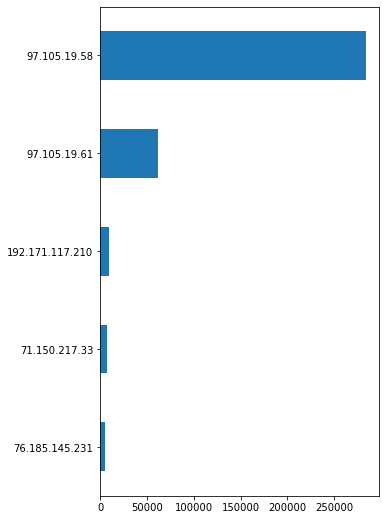

In [19]:
# visualizing the ip addresses
ip_df['count'].sort_values().tail(5).plot.barh(figsize=(5, 9))


In [20]:
# groupby path 
status_given_ip = (
    df.groupby('path')
    .ip.value_counts(normalize=True)
    .rename('proba_status_given_ip')
    .reset_index()
)
status_given_ip


,path,ip,proba_status_given_ip
0,%20https://github.com/RaulCPena,74.192.167.159,1.000000
1,',71.150.217.33,1.000000
2,",%20https://github.com/RaulCPena",74.192.167.159,1.000000
3,.git,72.178.123.71,1.000000
4,.gitignore,67.11.85.236,0.500000
...,...,...,...
120173,working-with-time-series-data,96.8.130.213,0.133333
120174,working-with-time-series-data,70.125.137.220,0.066667
120175,working-with-time-series-data,75.1.166.163,0.066667
120176,wp-admin,70.121.163.5,1.000000


In [21]:
jhbjhhb

NameError: name 'jhbjhhb' is not defined

In [ ]:
# df['city'] = df['ip'].apply(find_country_from_ip)


In [ ]:
# import requests


# def get_ip():
#     response = requests.get('https://api64.ipify.org?format=json').json()
#     return response["ip"]


# def get_location():
#     ip_address = get_ip()
#     response = requests.get(f'https://ipapi.co/{ip}/json/').json()
#     location_data = {
#         "ip": ip_address,
#         "city": response.get("city"),
#         "region": response.get("region"),
#         "country": response.get("country_name")
#     }
#     return location_data


# print(get_location())

In [ ]:
from simple_geoip import GeoIP
 
geoip = GeoIP("YOUR_API_KEY")
 
ipfile=  df.ip  #open("ips.csv","r")
 
sites=[]
for ip in ipfile:
    ip=ip.strip()
    try:
        data = geoip.lookup(ip)
        print(data)
        sites.append(data)
    except:
        pass

In [ ]:
ipfile.close()

